<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/ML_prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [113]:
# Step 1: Generate Synthetic Data
np.random.seed(42)
n_samples = 1000

data = {
    'num_visits': np.random.randint(1, 20, n_samples),
    'time_spent': np.random.uniform(1, 60, n_samples),
    'age_group': np.random.choice(['18-25', '26-35', '36-45', '46-60', '60+'], n_samples),
    'product_category': np.random.choice(['Electronics', 'Fashion', 'Home & Kitchen', 'Books'], n_samples),
    'purchased': np.random.choice([0, 1], n_samples, p=[0.5, 0.5])
}

df = pd.DataFrame(data)

In [114]:
df.head()

,num_visits,time_spent,age_group,product_category,purchased
0,7,16.973936,36-45,Fashion,1
1,15,38.995973,46-60,Books,0
2,11,25.115316,60+,Fashion,1
3,8,2.497795,36-45,Electronics,0
4,7,10.213003,60+,Books,0


In [115]:
# Step 2: Data Preprocessing
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])
df['product_category'] = le.fit_transform(df['product_category'])

X = df.drop(columns=['purchased'])
y = df['purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Step 3: Train Decision Tree Model
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=2,
    random_state=42
)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [122]:
# Step 4: Model Evaluation
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)

Accuracy: 0.535
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.55       102
           1       0.53      0.52      0.52        98

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200

Confusion Matrix:
 [[56 46]
 [47 51]]


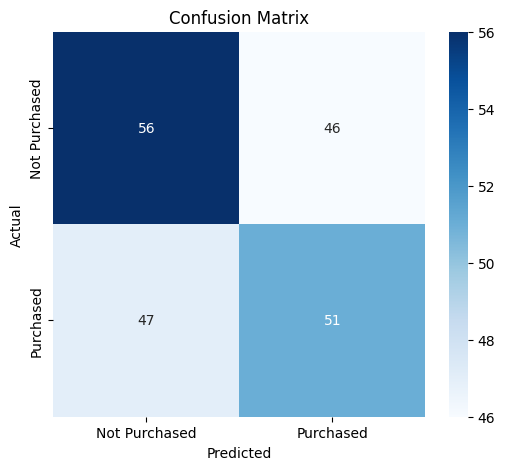

In [123]:
# Step 5: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

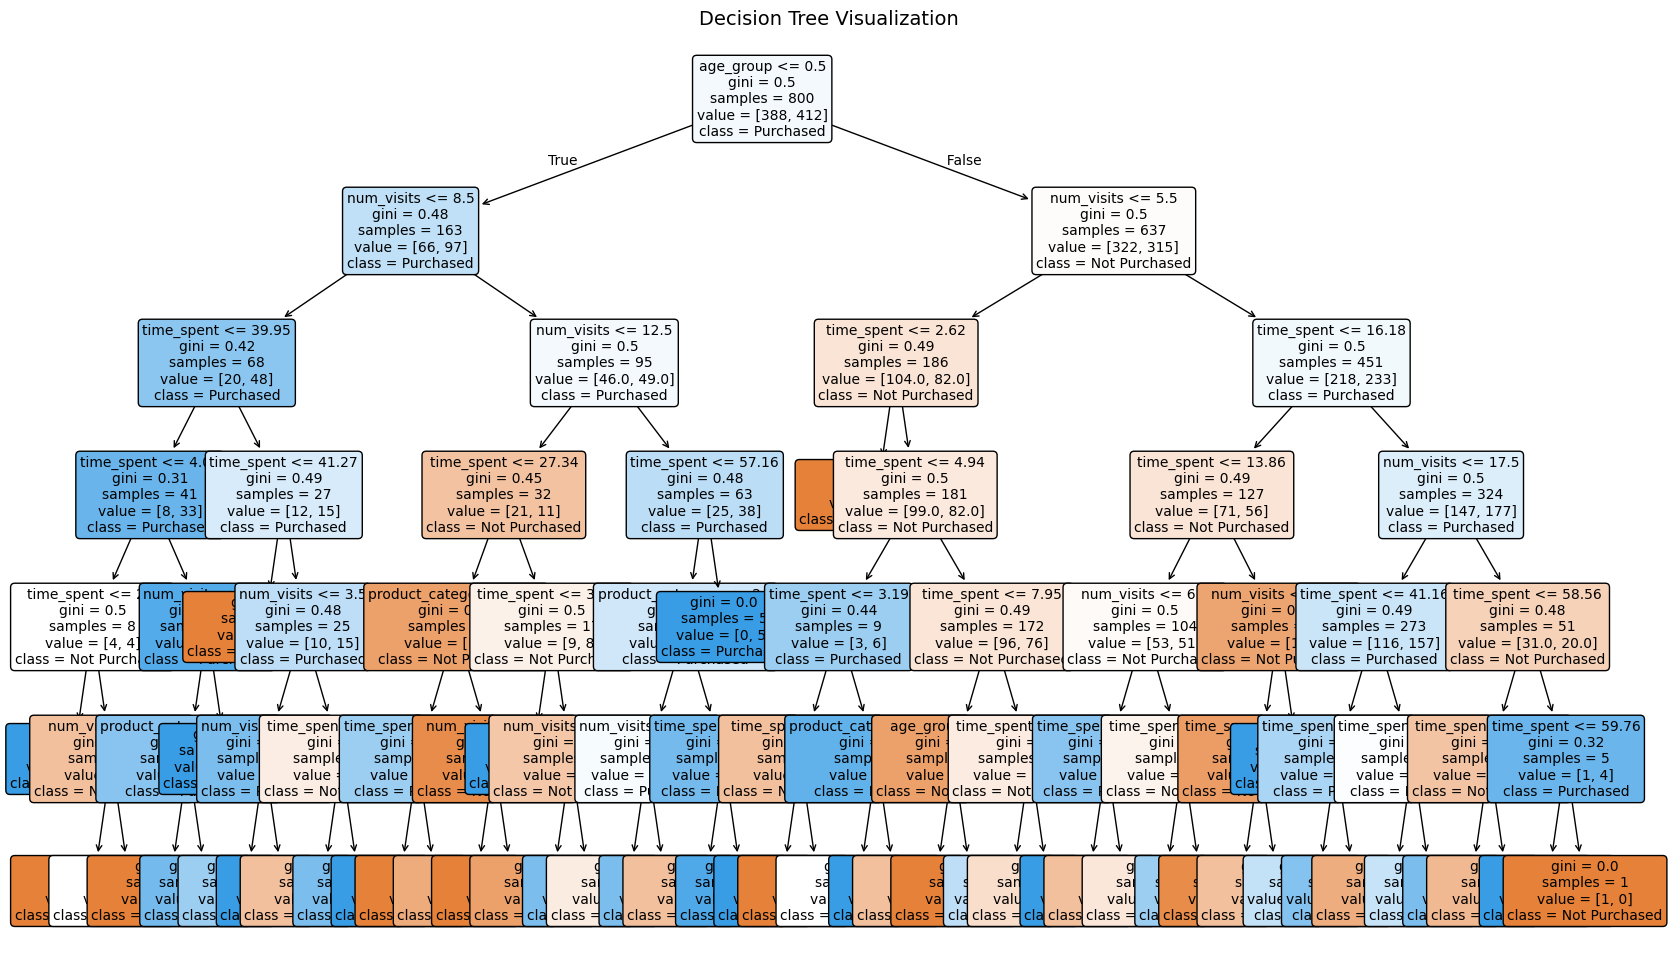

In [121]:
# Step 6: Detailed Decision Tree Plot
plt.figure(figsize=(20, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True,
    fontsize=10,
    precision=2
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()